#   Overview

Given problem statement deals with classification of comments to detect advertisements. This can be treated as classification problem. Most popular models/Approaches for this type classification is by using Support Vector Machines model or Navie Bayes classifier.
#### SVM
   An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories    are divided by a clear gap that is as wide as possible. In this solution we use SVM with Linear kernel, RBF kernel and          polynomial kernel to determine the better model.
#### Navie Bayes Classifier
   Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption    of conditional independence between every pair of features given the value of the class variable. In this solution we use      Multinomial NB, Gaussian NB, Bernoulli NB to determine the better model.

**Solution Steps**

The solution implemented here have five steps
1. Import Data
2. Data Visualization
3. Data Preprocessing
4. Fit the best Model
5. Classify and Predict for Test data

## 1. Import Data

Here data is imported from CSV as pandas data frames. Then the data is split into Training data and Cross Validation Data in the ratio of 80% and 20% randomly so that the data splitted is not skewed. This is to identify the best model that can be applied to the data. Then the chosen model can be applied on Test data. Here we can also get an idea of accuracy or ROC metric. In this part we **import data and have an initial look**

In [168]:
#Import and Split the test data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
training_data = df = pd.read_csv('train.csv', header = None)
training_data = training_data.drop([0],axis=0)
X_train, X_CV, y_train, y_CV = train_test_split(training_data[3], training_data[4], test_size=0.2)
train_Model = X_train
CV_data = X_CV
train_labels = y_train

In [169]:
#Setting the column indices to respective column names
training_data.columns = ['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS']

In [170]:
#Have a look at the data frame
training_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
1,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
2,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
3,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
5,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


## 2. Data Visualization

Here summary of data grouped by the advertisements can be seen. As shown out of 1157 comments 571 are not advertisements and 585 are advertisements. Then Length of comments is analyzed to get an idea of average length of comments. Finally a **Word Cloud** is generated to visualize most used words in the comments which are advertisements. In this part we **Visualize and analyze** comments data

In [171]:
training_data.describe()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
count,1157,1157,1019,1157,1157
unique,1156,1094,1019,1057,2
top,LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s,M.E.S,2015-05-16T02:11:43.099000,Check out this video on YouTube:﻿,1
freq,2,5,1,52,586


In [172]:
#Group the data based on CLASS 0 or 1(advertisement)
training_data.groupby('CLASS').describe()

COMMENT_ID                                                           \
           count unique                                          top freq   
CLASS                                                                       
0            571    571          z13puxp4xp35shhfy22bxx5pqlecxhqgc04    1   
1            586    585  LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s    2   

      AUTHOR                               DATE         \
       count unique              top freq count unique   
CLASS                                                    
0        571    559         5000palo    4   571    571   
1        586    535  Shadrach Grentz    5   448    448   

                                       CONTENT         \
                              top freq   count unique   
CLASS                                                   
0      2015-05-16T02:11:43.099000    1     571    558   
1      2015-05-19T03:49:19.732000    1     586    499   

                                               
                                     top freq  
CLASS                                          
0                                    wow    4  
1      Check out this video on YouTube:﻿   52

In [173]:
#adding a column to training data that gives the length of each comment
training_data['length']=training_data['CONTENT'].apply(len)
training_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,length
1,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56
2,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48
3,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39
4,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1,25
5,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1,67


In [174]:
#Import and download packages to get plot and word cloud
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

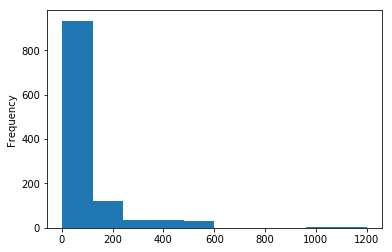

In [175]:
#Generate histogram to get an idea of range of lengths of comments
training_data['length'].plot(bins=10,kind='hist')

In [176]:
#get summary of lenghts
training_data.length.describe()

count    1157.000000
mean       94.253241
std       129.529575
min         2.000000
25%        30.000000
50%        48.000000
75%        97.000000
max      1200.000000
Name: length, dtype: float64

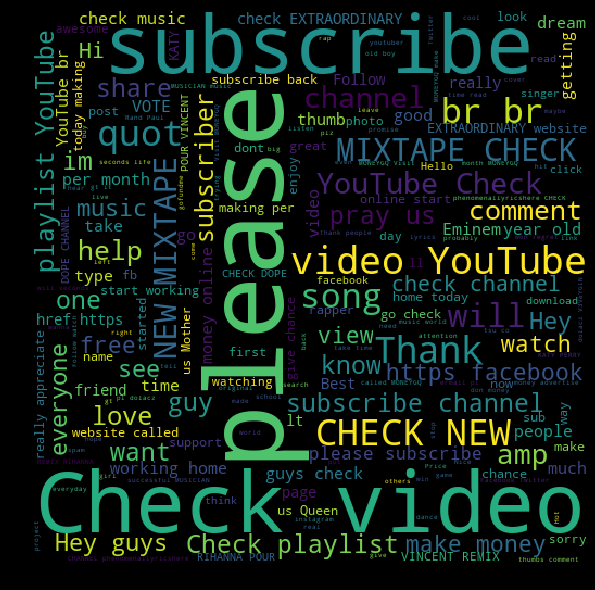

In [177]:
#Get the word cloud of comments which are advertisements
ad_words = ' '.join(list(training_data[training_data['CLASS'] == '1']['CONTENT']))
ad_wc = WordCloud(width = 512,height = 512).generate(ad_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ad_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## 3. Data Preprocessing

Here the comments data is preprocessed. The function process comment processes data that has four steps

**1. Lower case** In this part all characters are converted to lower case.

**2. gram** Here gram parameter is used to determine number of words to be taken into consideration. If gram = 1 , one word is considered at a time. If gram = 2, two words are considered at a time.

**3. Stop-words** Here stop words like 'if', 'to', 'the', 'this' are removed so that they can be a part of feature vector

**4. Stem** The words like ‘go’, ‘goes’, ‘going’ indicate the same activity. We can replace all these words by a single word ‘go’. This is called stemming. Porter stemmer is the algorithm used for stemming

**5. Remove all unwanted characters** In this part all unwanted characters are removed

Then all words used in comments after pre processing can be seen

In [178]:
#Preprocessing of data - Converting to Lowercase, gram, removing stop words, stemming
import nltk
import re
#nltk.download() to import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
def process_comment(comment, lower_case = True, stem = True, stop_words = True, gram = 1):
    if lower_case:
        comment = comment.lower()
    words = nltk.word_tokenize(comment)
    words = [w for w in words if len(w) > 2]
    if gram>1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    for w in words:
        w = w.encode('ascii', 'ignore').decode('ascii')
    return words

In [179]:
process_comment('akjsfhbieubfiushfbui  98w 4ru89w t89 u3 *U 89&98 ')

['akjsfhbieubfiushfbui', '98w', '4ru89w', 't89']

In [180]:
#Get a look at all the words in the comments after pre-processing
content = train_Model
all_words = []
for con in content:
    words = process_comment(con)
    all_words += words
all_words

['also',
 'luckymusiql',
 'probabl',
 'could',
 'help',
 'make',
 'big',
 'think',
 'talent',
 'look',
 'name',
 'internet',
 'hit',
 'get',
 'message\ufeff',
 'watch',
 '2015',
 'subscrib',
 'like',
 'mmph',
 'version',
 'better\ufeff',
 'love',
 'song',
 'make',
 'wan',
 'danc',
 'omg',
 'billion',
 'view',
 'video',
 'deserv',
 'view',
 'get',
 'gwar',
 'play',
 '2015',
 'superbowl',
 'http',
 '//www.change.org/petitions/the-national-football-league-allow-gwar-to-perform-the-2015-super-bowl-halftime-show',
 'share',
 'song',
 'racist',
 'kati',
 'perri',
 'roar',
 'offici',
 'http',
 '//youtu.be/cevxzvsjlk8\ufeff',
 'like',
 'much',
 'music',
 'good',
 'friend',
 'mine',
 'invent',
 'big',
 'dick',
 'formula',
 'small',
 'dick',
 'inch',
 'research',
 'topic',
 'research',
 'found',
 'secret',
 'knowledg',
 'peni',
 'enlarg',
 'appli',
 'learn',
 'inch',
 'dick',
 'absolut',
 'amaz',
 'result',
 'cours',
 'took',
 'month',
 'therefor',
 'written',
 'book',
 'issu',
 'order',
 'help'

### Raw code

The code in the next four boxes is the raw code to develop a feature vector consisting of 3000 words. This feature vector for every comment is used for predicting class of a comment. This feature vector is created by using 3000 most used words. But this is not used since there are many packages that implement this with a single line of code achieving optimal length of feature vector.

In [181]:
#from collections import Counter
#content = train_Model  
#all_words = []       
#for con in content:    
#    words = con.split()
#    all_words += words
#dictionary = Counter(all_words)
#list_to_remove = dictionary.keys()
#for item in list(list_to_remove):
#    if item.isalpha() == False: 
#        del dictionary[item]
#    elif len(item) == 1:
#        del dictionary[item]
#dictionary = dictionary.most_common(3000)

In [182]:
#import numpy as np
#n = len(train_Model)
#content = train_Model
#feature_matrix = np.zeros((n,3000))
#documentID = 0
#for con in content:
#    words = con.split()
#    for word in words:
#        wordID = 0
#        for i,d in enumerate(dictionary):
#            if d[0] == word:
#                wordID = i
#                feature_matrix[documentID,wordID] = words.count(word)
#    documentID = documentID + 1

In [183]:
#train_labels = training_data[4]
#train_matrix = feature_matrix

In [184]:
#import numpy as np
#n = len(CV_data)
#content = CV_data
#features_matrix = np.zeros((n,3000))
#docID = 0
#for con in content:
#    words = con.split()
#    for word in words:
#        wordID = 0
#        for i,d in enumerate(dictionary):
#            if d[0] == word:
#                wordID = i
#                features_matrix[docID,wordID] = words.count(word)
#    docID = docID + 1
#test_matrix = features_matrix

## 4. Fit the best Model

Here the optimal model is finally trained. Here pipeline is used to train the data using a model. Here we use **CountVectorizer** to convert the comments data into optimal length of feature vector. **TfidfTransformer** is to transform a count matrix to a normalized tf or tf-idf representation.Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

Then **six models** - MultinomialNB, GaussianNB, BernoulliNB, SVC, NuSVC andLinearSVC are used. These models are fitted on training data and their performance is calculated on Cross-validation data as we split the data above.Based on Evaluation metrics - accuracy and roc_auc_score of predicted labels for Cross-Validation data, **LinearSVC** has the best fit. **NuSVC** also gives a similar fit with 94% accuracy and 0.94 roc_auc_score. LinearSVC model has 97% accuracy and 0.97 as roc_auc_score for Cross validation data.

In [185]:
#Implemting SVM and Navie Bayes model for classification, fit the model with Training data and predict for Cross validation data to get accuracy and roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
pipeline = Pipeline([
   ( 'bow',CountVectorizer(process_comment)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LinearSVC()),
])
pipeline.fit(train_Model,train_labels)
predictions = pipeline.predict(CV_data)
result = np.array(predictions)
result = result.astype(np.int)
label = np.array(y_CV)
label = label.astype(np.int)
C = 0
W = 0
for i in range(0,len(result)):
    if result[i] == label[i]:
        C = C+1
    else:
        W = W+1

In [186]:
#Compare the predicted and actual labels manually
print(result)
print(label)

[0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1
 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0
 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 1 1]
[0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1
 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0
 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 1 1]


In [187]:
#Calculation of evaluation metrics - Accuracy and roc_auc_score
Accuracy = (C/(C+W))*100
print(Accuracy)
from sklearn.metrics import roc_auc_score
a = roc_auc_score(label, result)
print(a)

96.98275862068965
0.969892952720785


## 5. Classify and Predict for Test data

The **LinearSVC** model trained with 80% train data is now used to predict the labels of test data given in test.csv. Then the predictions are written to a csv file

In [188]:
#Predict labels for test data
test_data = df1 = pd.read_csv('test.csv', header = None)
test_data = test_data.drop([0],axis=0)

In [189]:
predictions_test = pipeline.predict(test_data[4])

In [190]:
#Export the column ID and test data predictions into a csv file
test_data = test_data.drop([1,2,3,4],axis=1)
test_data['CLASS'] = predictions_test
test_data.columns = ['ID','CLASS']
test_data.to_csv('Solution(Predictions_for_Testcasesf).csv',index = False)